In [1]:
import pandas as pd
from statistics import mean
import numpy as np

In [2]:
import json
from typing import List

In [3]:
path = "stats.json"

In [4]:
datas = pd.read_json(path, lines=True)

In [28]:
nullValues = ["nan", "null", ""]

In [29]:
# metodo che calcola il numero di elementi diversi per ciascuna colonna e il numero di valori
# nulli totali del dataset
def calculateDifferentValueForColumnAndNumberOfNan(dataset, column2differentvalues, numberOfNan=0):
    # per ogni tabella del dataset
    for i in range(len(dataset)):
        columnsnames = list((dataset["columns2dataColumn"][i]))
        # per ogni colonna della tabella
        for e in range(len(columnsnames)):
            columnelems = list((dataset["columns2dataColumn"][i])[columnsnames[e]])
            columnmap = dict()
            # scorri la lista di elementi della colonna
            for l in range(len(columnelems)):
                # se il valore è nullo incrementa la variabille di nan
                if (str(columnelems[l]).lower().strip() in nullValues):
                    numberOfNan = numberOfNan + 1.0
                # aggiorna la mappa di termini della colonna
                columnmap.update({columnelems[l]: 1})
            # aggiorna la mappa colonna numero di elementi diversi
            table_column = dataset["id"][i] + columnsnames[e]
            column2differentvalues.update({table_column: len(columnmap.keys())})
    return numberOfNan

In [30]:
totRows = len(datas)
avgRows = (datas["numRows"]).mean()
avgColumns = (datas["numColumns"]).mean()
nnan = 0
column2differentvalues = dict()
nnan = calculateDifferentValueForColumnAndNumberOfNan(datas, column2differentvalues, nnan)
avgNan = (nnan / len(datas))
#parsingtime
parsingtime = 156533921459  #ns
# indexingtime senza multithreading
indexingtimewithout = 0 
# indexingtime con multithreading
indexingtime = 75921362834   #ns
# searchingtime senza multithreading
searchingtimewithout = 181 #s
# searchingtime con 2 core
searchingtime2core = 101 #s
# searchingtime con 4 core
searchingtime2core = 65 #s
# searchingtime con 8 core
searchingtime2core = 52 #s
# searchingtime con multithreading con 9 core
searchingtime = 41 #s
# searchingtime con multithreading con 10 core
searchingtime10core = 36 #s

In [27]:
print("Numero totale di tabelle: ", totRows)
print("Numero medio di righe", avgRows)
print("Numero medio di colonne", avgColumns)
print("Numero di valori null", nnan)
print("Numero medio di valori nulli", avgNan)
print("Tempo di parsing del file json", parsingtime)
print("indexingtime senza multithreading", indexingtime)
#print(column2differentvalues)

Numero totale di tabelle:  550271
Numero medio di righe 18.20436839302816
Numero medio di colonne 4.487583390729295
Numero di valori null 378361.0
Numero medio di valori nulli 0.6875902964175833
Tempo di parsing del file json 156533921459
indexingtime senza multithreading 75921362834


In [8]:
column2diff = pd.Series(column2differentvalues.values())

In [10]:
import matplotlib as plt
from matplotlib.pyplot import grid

print(column2diff[:])


0          13
1          10
2          12
3           8
4           3
           ..
2027075     4
2027076    30
2027077    20
2027078    38
2027079    38
Length: 2027080, dtype: int64


## Plot della distribuzione del numero di righe

In [14]:
setColor = "#2364AA"

(0.0, 50.0)

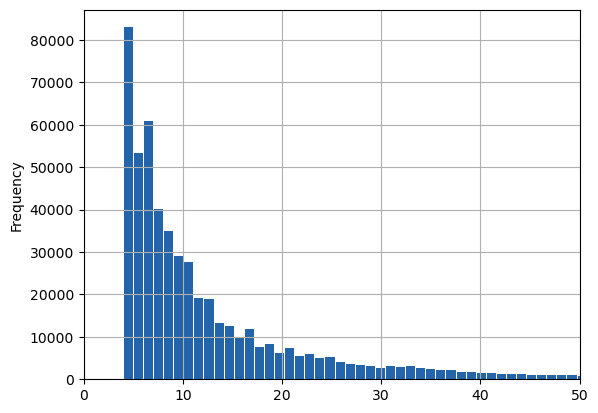

In [12]:
numrows_distr = datas["numRows"].plot.hist(bins=6000, grid=True, color=setColor, rwidth=0.9)
numrows_distr.set_xlim(0, 50)

Plot del numero di valori diversi per colonna

(0.0, 25.0)

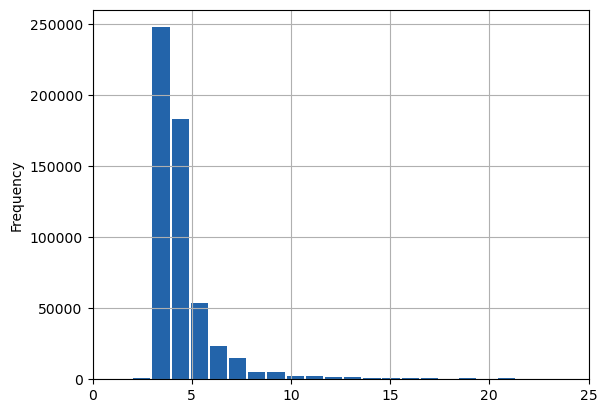

In [13]:
numcolumns_distr = datas["numColumns"].plot.hist(bins=30000, grid=True, color=setColor, rwidth=0.9)
numcolumns_distr.set_xlim(0, 25)

(0.0, 50.0)

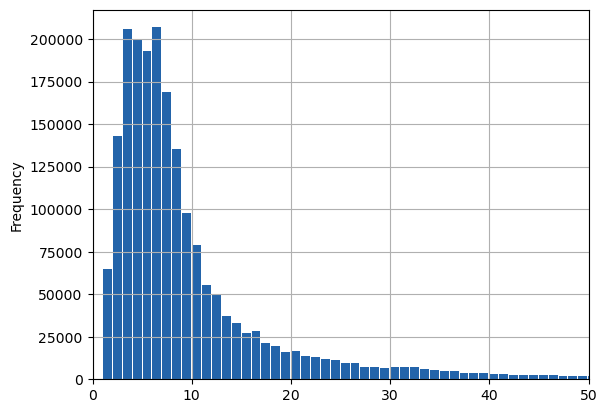

In [15]:
coldiff = column2diff.plot.hist(bins=6000, grid=True, color=setColor, rwidth=0.9)
coldiff.set_xlim(0, 50)

In [ ]:
numrows2count = dict()
for row in datas["numRows"]:
    if numrows2count.get(row):
        numrows2count[row] = numrows2count.get(row) + 1
    else:
        numrows2count[row] = 1
print(numrows2count)
print("\n")
numrows2countsorted = sorted(numrows2count.items(), key=lambda x:x[1])
print(numrows2countsorted)

In [ ]:
numcolumns2count = dict()
for column in datas["numColumns"]:
    if numcolumns2count.get(column):
        numcolumns2count[column] = numcolumns2count.get(column) + 1
    else:
        numcolumns2count[column] = 1
print(numcolumns2count)
print("\n")
numcolumns2countsorted = sorted(numcolumns2count.items(), key=lambda x:x[1])
print(numcolumns2countsorted)
